In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from data.df_io import read, get_feat_lables
from data.df_prep import get_specific_split, pre_processing
from ai_models.PLA import PLA, PocketPLA
from ai_models.regression import LinearRegression, LogisticRegression
from metrics.metrics import compute_acc, confusion, eficiency_report
from visualization.models_plots import show_model_line


train_path = Path("../digits/db/train_redu.csv")
test_path = Path("../digits/db/test_redu.csv")

In [2]:
df_train = read(train_path, sep=",")
df_test = read(test_path, sep=",")

In [3]:
X_train, Y_train = get_feat_lables(df_train)
X_test, Y_test = get_feat_lables(df_test)

## Get specific 1x5 dataset

In [4]:
X_train_1x5, Y_train_1x5 = get_specific_split(X_train, Y_train, 1, 5)
X_test_1x5, Y_test_1x5 = get_specific_split(X_test, Y_test, 1, 5)

In [5]:
X_train_1x5

array([[ 44.7       ,  69.27098039],
       [ 59.85      ,  83.44745098],
       [ 48.55      ,  79.04254902],
       ...,
       [110.73      , 133.02137255],
       [ 99.31      , 132.13058824],
       [101.17      , 141.3672549 ]])

In [6]:
Y_train_1x5

array([ 1,  1,  1, ..., -1, -1, -1])

In [7]:
base_column = np.ones((X_train_1x5.shape[0], 1))
base_column

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [8]:
X_train_1x5 = np.hstack((base_column, X_train_1x5))
X_train_1x5

array([[  1.        ,  44.7       ,  69.27098039],
       [  1.        ,  59.85      ,  83.44745098],
       [  1.        ,  48.55      ,  79.04254902],
       ...,
       [  1.        , 110.73      , 133.02137255],
       [  1.        ,  99.31      , 132.13058824],
       [  1.        , 101.17      , 141.3672549 ]])

In [9]:
base_column = np.ones((X_test_1x5.shape[0], 1))
X_test_1x5 = np.hstack((base_column, X_test_1x5))
X_test_1x5

array([[  1.        ,  51.64      ,  71.4427451 ],
       [  1.        ,  51.67      ,  85.05058824],
       [  1.        ,  44.85      ,  72.67352941],
       ...,
       [  1.        ,  95.14      , 122.22686275],
       [  1.        , 106.88      , 128.00862745],
       [  1.        , 117.64      , 123.37882353]])

In [10]:
zeros_Y_train_1x5 = Y_train_1x5.copy()
zeros_Y_train_1x5[zeros_Y_train_1x5 == -1] = 0

zeros_Y_test_1x5 = Y_test_1x5.copy()
zeros_Y_test_1x5[zeros_Y_test_1x5 == -1] = 0

## Train and test PLA

In [11]:
pla_model = PLA()
it, w, W = pla_model.fit(X_train_1x5, Y_train_1x5, epochs=20000)

In [12]:
it

20000

In [13]:
w

[np.int64(5254),
 np.float64(-134.30000000000268),
 np.float64(43.18156862745316)]

### Ein eval

In [14]:
Y_pred = pla_model.predict(X_train_1x5, w)
compute_acc(Y_train_1x5, Y_pred)

0.8986486486486487

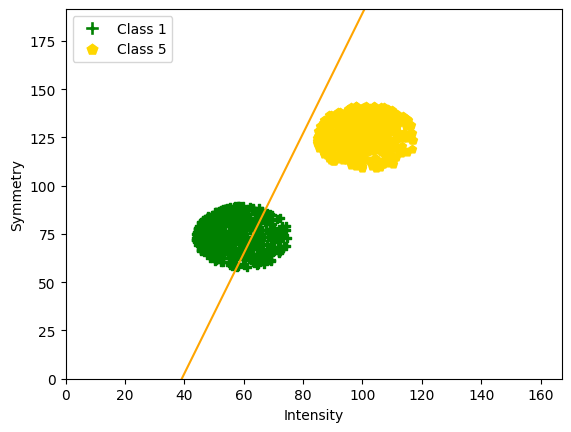

In [15]:
Y_train_1x5_plot = pd.DataFrame({"label": Y_train_1x5}).replace(-1, 5)
show_model_line(
    pd.DataFrame(X_train_1x5, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train_1x5_plot, columns=["label"]),
    w,
    1,
    5,
    None,
    None,
)

### Eout eval

In [16]:
Y_pred = pla_model.predict(X_test_1x5, w)
compute_acc(Y_test_1x5, Y_pred)

0.9056603773584906

In [17]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 0.9056603773584906,
 'precision': np.float64(1.0),
 'recall': np.float64(0.8116438356164384),
 'f1': np.float64(0.8960302457466919)}

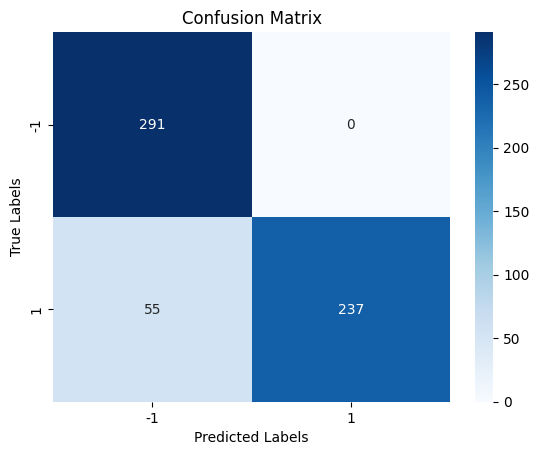

In [18]:
confusion(Y_test_1x5, Y_pred)

## Train and test Pocket PLA

In [19]:
pla_model = PocketPLA()
it, w = pla_model.fit(X_train_1x5, Y_train_1x5, epochs=20000)

In [20]:
it

20000

In [21]:
w

[np.int64(1), np.float64(56.25), np.float64(81.2327450980392)]

### Ein eval

In [22]:
Y_pred = pla_model.predict(X_train_1x5, w)
compute_acc(Y_train_1x5, Y_pred)

0.5135135135135135

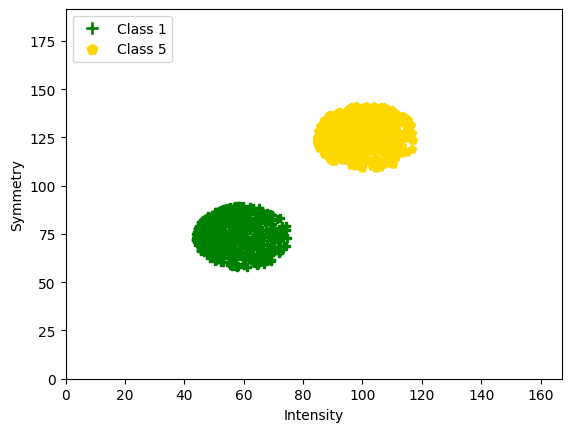

In [23]:
Y_train_1x5_plot = pd.DataFrame({"label": Y_train_1x5}).replace(-1, 5)
show_model_line(
    pd.DataFrame(X_train_1x5, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train_1x5_plot, columns=["label"]),
    w,
    1,
    5,
    None,
    None,
)

### Eout eval

In [24]:
Y_pred = pla_model.predict(X_test_1x5, w)
compute_acc(Y_test_1x5, Y_pred)

0.5008576329331046

In [25]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 0.5008576329331046,
 'precision': np.float64(0.5008576329331046),
 'recall': np.float64(1.0),
 'f1': np.float64(0.6674285714285715)}

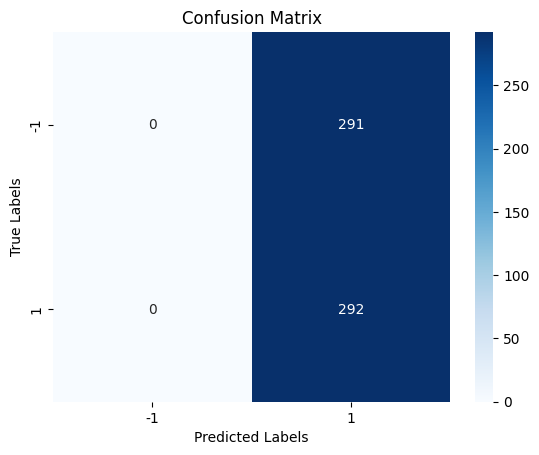

In [26]:
confusion(Y_test_1x5, Y_pred)

## Train and test linear regression

In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train_1x5, Y_train_1x5)
w = linear_model.getW()

### Ein eval

In [28]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(Y_train_1x5, Y_pred)

1.0

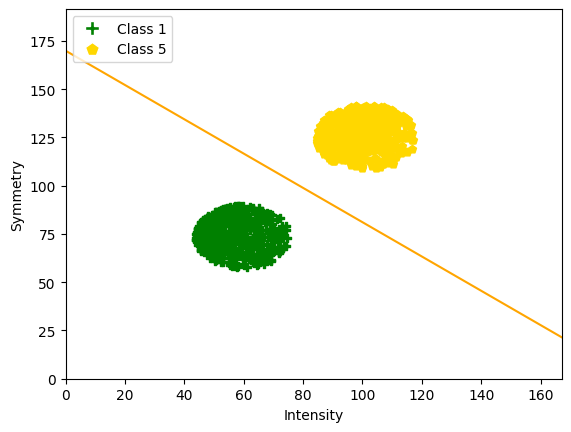

In [29]:
Y_train_1x5_plot = pd.DataFrame({"label": Y_train_1x5}).replace(-1, 5)
show_model_line(
    pd.DataFrame(X_train_1x5, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train_1x5_plot, columns=["label"]),
    w,
    1,
    5,
    None,
    None,
)

### Eout eval

In [30]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(Y_test_1x5, Y_pred)

1.0

In [31]:
eficiency_report(Y_test_1x5, Y_pred)

{'acc': 1.0,
 'precision': np.float64(1.0),
 'recall': np.float64(1.0),
 'f1': np.float64(1.0)}

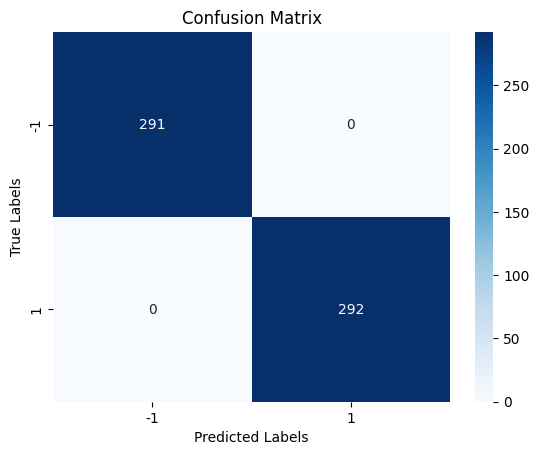

In [32]:
confusion(Y_test_1x5, Y_pred)

## Train and test logistic regression

In [33]:
linear_model = LogisticRegression(lr=0.001, n_iters=10000, bs=128)
linear_model.fit(X_train_1x5, zeros_Y_train_1x5)
w = linear_model.getW()

In [34]:
linear_model.cost

np.float64(0.14245298939183818)

### Ein eval

In [35]:
Y_pred = linear_model.predict(X_train_1x5)
compute_acc(zeros_Y_train_1x5, Y_pred)

1.0

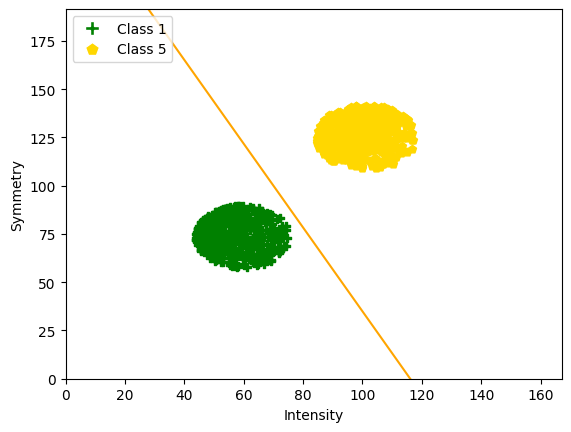

In [36]:
Y_train_1x5_plot = pd.DataFrame({"label": Y_train_1x5}).replace(-1, 5)
show_model_line(
    pd.DataFrame(X_train_1x5, columns=["bias", "intensity", "symmetry"]),
    pd.DataFrame(Y_train_1x5_plot, columns=["label"]),
    w,
    1,
    5,
    None,
    None,
)

### Eout eval

In [37]:
Y_pred = linear_model.predict(X_test_1x5)
compute_acc(zeros_Y_test_1x5, Y_pred)

1.0

In [38]:
eficiency_report(zeros_Y_test_1x5, Y_pred)

{'acc': 1.0,
 'precision': np.float64(1.0),
 'recall': np.float64(1.0),
 'f1': np.float64(1.0)}

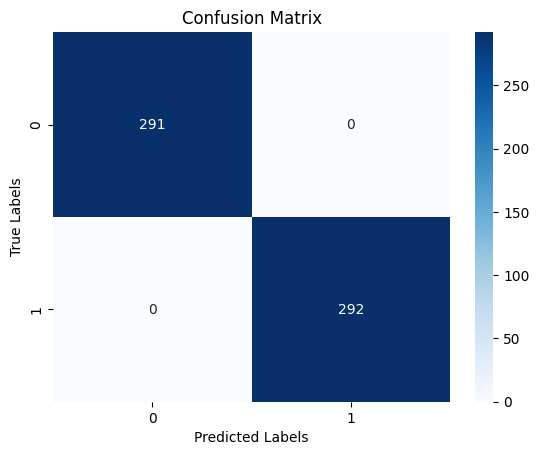

In [39]:
confusion(zeros_Y_test_1x5, Y_pred, 0, 1)